In [1]:
import warnings
warnings.filterwarnings('ignore')

# Markdown
* a document formatting approach that makes writing documentation (or anything) really easy
* can do markdown outside of jupyter
    * filename: `something.md`

``` python
def example(x):
    return f'I am {x}'

```

# Machine Learning Issues

# Let's consider a scatterplot
* at differing levels of complexity
    * complexity can refer to the number of features in some datea, width of a matrix, etc
    * here, we'll consider complexity as the order of polynomial
    
    
 $$
 f(x) = ax ^ 4 + bx ^ 3 + cx ^ 2 + dx + C
 $$

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

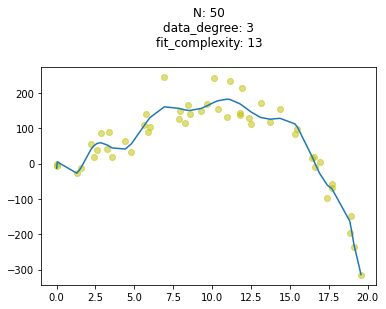

In [28]:
def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps
    
    np.random.seed(seed=23)
    
    # generating some random x values
    
    x = np.random.rand(N) * 20
    
    # define polynomial
    if degree == 1:
        y = 5 * x + 3
    elif degree == 2:
        y = 3 * x ** 2 + 5 * x + 3
    elif degree == 3:
        y = -0.2 * x ** 3 + 3 * x ** 2 + 5*x + 3
    elif degree == 4:
        y = 0.006 * x ** 4 + -0.2 * x ** 3 + 3 * x ** 2 + 5 * x + 3
        
    # help us draw a fit line
#     fit = np.polyfit(x, y, 1)
#     fit_fn = mp.polyld(fit)
    
    # get scatter range
    y_val_range =  np.ptp(y)
    
    # add gaussian/normal noise
    
    y = [pt + np.random.normal(loc=0.0, scale=((1./10)*y_val_range)) for pt in y]
    
    # line that we draw
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))
    
    # plot
    plt.title('N: {}\n'.format(N) +'data_degree: {}\n'.format(degree) + 'fit_complexity: {}\n'.format(fit_complexity))
    
    plt.scatter(x, y, c='y', alpha=0.5)
    
    plt.plot(np.unique(x), regr)
    
    plt.show()
    
plot_scatter_fit(num_samps=50, fit_complexity=13, degree=3)
    

## Occam's Razor
* does a simpler model effectively explain the data/discover a signal in relation to a more complex model
    * should choose the simpler model that get the job done effectively
    
    
    

# Apply Clasification Problem
* using the Iris Dataset
* Apply KNN, simple/naive algorithm
 

* Supervised Learning
    * Classification
    * Regression
    * target, minimize prediction error

* Unsupervised Learning
    * if different rows in x have subcategories or clusters that they fitting into 
    * different types of people ( difference b/w them
    * trying to discern signal
                                 

## KNN(K-Nearest Neighbors)
* KNN is supervised
    * **X** and y data
* KNN is non-parametric
    * potential to interpret non-linear data signals
* KNN training data IS ESSENTIALLY the fit model
    * must store dat/model in memory
    * prediction is computationally expensive
* KNN predction is a majority vote between the k most similar instances on a yet unseen data point

# Basic Algorithm for KNN


```
Given a structured data set:
    set value of k
    for each data point:
        fing k most similar data points
        check class of each of k similar data points
        assume current data point is of the majority class checked
        
```

## Distance/Similarity metrics
* euclidean distance
* manhattan distance
* consine similarity
* hamming distance/similarity

<br><br><br>

# General ML Workflow
## 1. Import/Clean/Reshape Data
* EDA (Exploratory Data Analysis)
    * most time consuming stage

In [37]:
# load libraries
import pandas as pd

# define columns

names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load training data

df = pd.read_csv('iris.data.csv', header=None, names=names)

columns = df.columns

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:

# What are the class names?
df['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [39]:
break_at = 20
for row in df['sepal_width']:
    print(row)
    break_at -= 1
    if break_at <= 0: break

3.5
3.0
3.2
3.1
3.6
3.9
3.4
3.4
2.9
3.1
3.7
3.4
3.0
3.0
4.0
4.4
3.9
3.5
3.8
3.8


# Plot Data

In [5]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['class']]

NameError: name 'df' is not defined

In [6]:
from sklearn.preprocessing import LabelEncoder

def plot_features(X_df, y_df, columns):
    le = LabelEncoder()
    y = le.fit_transform(y_df)
    
    # every pair of features
    built_pairs = []
    for col1 in columns[:-1]:
        for col2 in columns[:-1]:
            if col1 != col2 and (col1, col2) not in built_pairs and (col2, col1) not in built_pairs:
                tup = (col1, col2)
                built_pairs.append(tup)
                
    for pair in built_pairs:
        x_lab = pair[0]
        y_lab = pair[1]
        
        X = X_df[[x_lab, y_lab]].values
        
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        
        # built plot
        plt.figure(2, figsize=(8,6))
        plt.clf()
        
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        
        plt.xticks(())
        plt.yticks(())
        
        plt.show()
        
plot_features(X, y, columns)

NameError: name 'X' is not defined

## 2. Train/Test Split


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
# least separable features
X = np.array(df[['sepal_length', 'sepal_width']])
y = np.array(df[['class']])

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

## 3. Search for hyperparameters
   * hyperparams:inputs to the model that we can tune to make the model work better on the data
   * this is where we do cross validation

In [10]:
# fold accuracy scores for vals of k neighbors
beighbors = list(range(1, 100))
cv_train_scores = []
cv_test_scores = []

for k in neighbors:
    knn = KneighborsClassifier(n_neighbors=k, p=1)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # get preds on train
    y_train_pred = knn.predict(X_train)
    cv_train_scores.append(accuracy_score(y_train, y_train_pred))
    
    # get preds on test
    y_train_pred = knn.predict(X_test)
    cv_test_scores.append(accuracy_score(y_test, y_test_pred))
    
    

NameError: name 'neighbors' is not defined

In [11]:
cv_train_scores;

In [13]:
cv_test_scores

[]

## Plot Results

In [14]:
import mathplotlib.patches as mpatches

test_max = cv_test_scores.index(max(cv_test_scores[::-1]))

opt_k = neighbors[test_max]

axes = plt.gca()
axes.set_xlim([0, len(neighbors)])
axes.set_ylim([min(cv_test_scores) -0.2, 1.1])

orange_patch = mpatches.Patch(color='orange', label='Train')
blue_patch = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[orange_patch, blue_patch])

title = f'Accuracy CrossVal, optimal: {opt_k}'

axes.plot(neigh)


ModuleNotFoundError: No module named 'mathplotlib'

$$

def factorial(n):

    prod = 1

    for num in range(2, n+1):
        prod *= num
    
    return prod


def combinations(n, k):
    return factorial(n) / (factorial(n-k) * factorial(k))


def binomial_pmf(n, k, p=0.5):
    return combinations(n, k) * (p ** k) * (1-p) ** (n-k)

$$
